# Gossip Girl

In [3]:
import requests, re
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import lxml

# Network
## List of charachters/ nodes

In [4]:
#Get list 

import warnings
warnings.filterwarnings('ignore')


def CharacterList(url):
    websiteURL =  requests.get(url)
    soup = BeautifulSoup(websiteURL.text)
    characterGallery = soup.find_all('div',{'class':'category-page__members'})
    characters = []

    for character in characterGallery:

        images = character.findAll("img")
        for image in images:
            try:
                characterName = image.get("alt")
            except:
                pass

            characters.append(characterName)

    return characters


ListOfCharacter = CharacterList("https://gossipgirl.fandom.com/wiki/Category:Characters")
#ListOfCharacter

ListCharachters   = set(ListOfCharacter)

print("number of nodes: ", len(ListCharachters))




number of nodes:  110


### Remove non human nodes

In [5]:
toRemove = ["relationship", 'Gossip', 'Season', 'Tripp\xa0Vanderbilt','Social Media', 'Breakfast', 'Melanie91' ]

toRemove = set(toRemove)
listCharachters = [c for c in ListCharachters if not any(r in toRemove for r in c.split())]

print("number of nodes after stripping: ", len(listCharachters))


number of nodes after stripping:  94


### Create DF 

In [6]:

DF = pd.DataFrame(columns=['Character', 'Family', 'Romances', 'Friends', 'Enemies','size/episodes', 'gender'])
DF['Character'] = listCharachters





### Get edges and relationships

In [7]:

def getRelationship(nodes):
    
    for i, charachter in enumerate(nodes):
        url =  requests.get(f"https://gossipgirl.fandom.com/wiki/{charachter}")
        soup = BeautifulSoup(url.text)

        Family= []
        Romances = []
        Friends = []
        Enemies = []

        try:
            infoBox = soup.findAll('section',{'class':'pi-item pi-group pi-border-color'})[1]
            family =  infoBox.findAll('div', {'data-source':"Family (only TV series)"}) 

            FamilyNames = re.findall('title="(.*?)"',str(family))

            FamilyNames = set(FamilyNames)
            for name in FamilyNames:
                if name in ListCharachters:
                    Family.append(name) 
        except: 
            Family= []
        try: 
            infoBox = soup.findAll('section',{'class':'pi-item pi-group pi-border-color'})[1]
            romances = infoBox.findAll('div', {'data-source':"Romances (only TV series)"})

            romanceNames = re.findall('title="(.*?)"',str(romances))
            romanceNames = set(romanceNames)
            for name in romanceNames:
                if name in ListCharachters:
                    Romances.append(name) 

        except:
            Romances = []
        try: 
            infoBox = soup.findAll('section',{'class':'pi-item pi-group pi-border-color'})[1]
            friends = infoBox.findAll('div', {'data-source':"Friends (only TV series)"})

            friendsNames = re.findall('title="(.*?)"',str(friends))
            friendsNames = set(friendsNames)
            for name in friendsNames:
                if name in ListCharachters:
                    Friends.append(name) 

        except:
            Friends = []

        try: 
            infoBox = soup.findAll('section',{'class':'pi-item pi-group pi-border-color'})[1]
            enemies = infoBox.findAll('div', {'data-source':"Enemies (only TV series)"})

            enemiesNames = re.findall('title="(.*?)"',str(enemies))
            enemiesNames = set(enemiesNames)
            for name in enemiesNames:
                if name in ListCharachters:
                    Enemies.append(name) 
        except:
            Enemies = []

        DF['Family'][i] = Family
        DF['Romances'][i] = Romances
        DF['Friends'][i] = Friends
        DF['Enemies'][i] = Enemies
        DF['size/episodes'][i] = len(Family) + len(Romances) + len(Friends) + len(Enemies)



### Gets gender 

In [11]:
def getGenders():
    websiteURL =  requests.get("https://gossipgirl.fandom.com/wiki/Category:Females")
    soup = BeautifulSoup(websiteURL.text)
    FemaleGallery = soup.find_all('div',{'class':'category-page__members'})
    females = []

    for female in FemaleGallery:

        images = female.findAll("img")
        for image in images:
            try:
                characterName = image.get("alt")
            except:
                pass

            females.append(characterName)

    for i  in range(len(listCharachters)):
        if listCharachters[i] in females:
            DF['gender'][i] = 'pink'
        else: 
            DF['gender'][i] = 'grey'
            

getGenders()
getRelationship(listCharachters)
DF


,Character,Family,Romances,Friends,Enemies,size/episodes,gender
0,Russell Thorpe,[Raina Thorpe],[Lily van der Woodsen],[Damien Dalgaard],"[Bart Bass, Chuck Bass]",5,grey
1,Howard Archibald,"[Tripp van der Bilt, William van der Bilt, Ann...",[Anne Archibald],[],[],5,grey
2,Aki Menzies,[],"[Audrey Hope, Max Wolfe]","[Julien Calloway, Obie Bergmann IV, Monet de H...",[Rafa Caparros],7,grey
3,Carol Rhodes,"[Eric van der Woodsen, Dan Humphrey, CeCe Rhod...",[William van der Woodsen],[],"[Ivy Dickens, Lily van der Woodsen]",11,grey
4,Cast Social Media,[],[],[],[],0,grey
...,...,...,...,...,...,...,...
89,Team Brooklyn,[],[],[],[],0,grey
90,Harold Waldorf,"[Bart Bass, Elizabeth Fisher, Henry Bass, Elea...",[Eleanor Waldorf],"[Cyrus Rose, Dorota Kishlovsky]",[],8,grey
91,Poppy Lifton,[],[Gabriel Edwards],[Gabriel Edwards],"[Georgina Sparks, Serena van der Woodsen]",4,pink
92,Jordan Steele,[],[Nate Archibald],[],[],1,grey


### help functions

In [30]:
## help function 

#get edge colors
def getEdgeColors(edges, edgeListFamily, edgeListRomances, edgeListFriends):
    colors = []
    for e in edges:
        if e in edgeListFamily:
            colors.append("grey")
        elif e in edgeListRomances:
            colors.append("pink")
        elif e in edgeListFriends:
            colors.append("blue")
        else: 
            colors.append("purple")
    return colors

def getGender(node):
    return DF['gender'][listCharachters.index(node)]

def getSize(node):
    return DF['size/episodes'][listCharachters.index(node)]

### Creates the whole network

[1020, 1020, 1420, 2220, 20, 1820, 620, 1220, 1820, 20, 3020, 220, 420, 220, 3020, 1220, 420, 4420, 820, 20, 420, 620, 5020, 820, 420, 820, 620, 820, 1020, 1020, 220, 1020, 20, 1220, 20, 2220, 420, 1020, 2220, 1020, 2620, 5220, 820, 1420, 5020, 820, 4420, 220, 1020, 1220, 820, 620, 20, 20, 620, 820, 220, 3020, 2620, 620, 1020, 620, 1220, 1420, 620, 6620, 20, 2820, 2020, 2420, 620, 820, 220, 1420, 1420, 2020, 2420, 420, 420, 3820, 420, 2420, 820, 2020, 1420, 820, 420, 1820, 1020, 20, 1620, 820, 220, 1020]


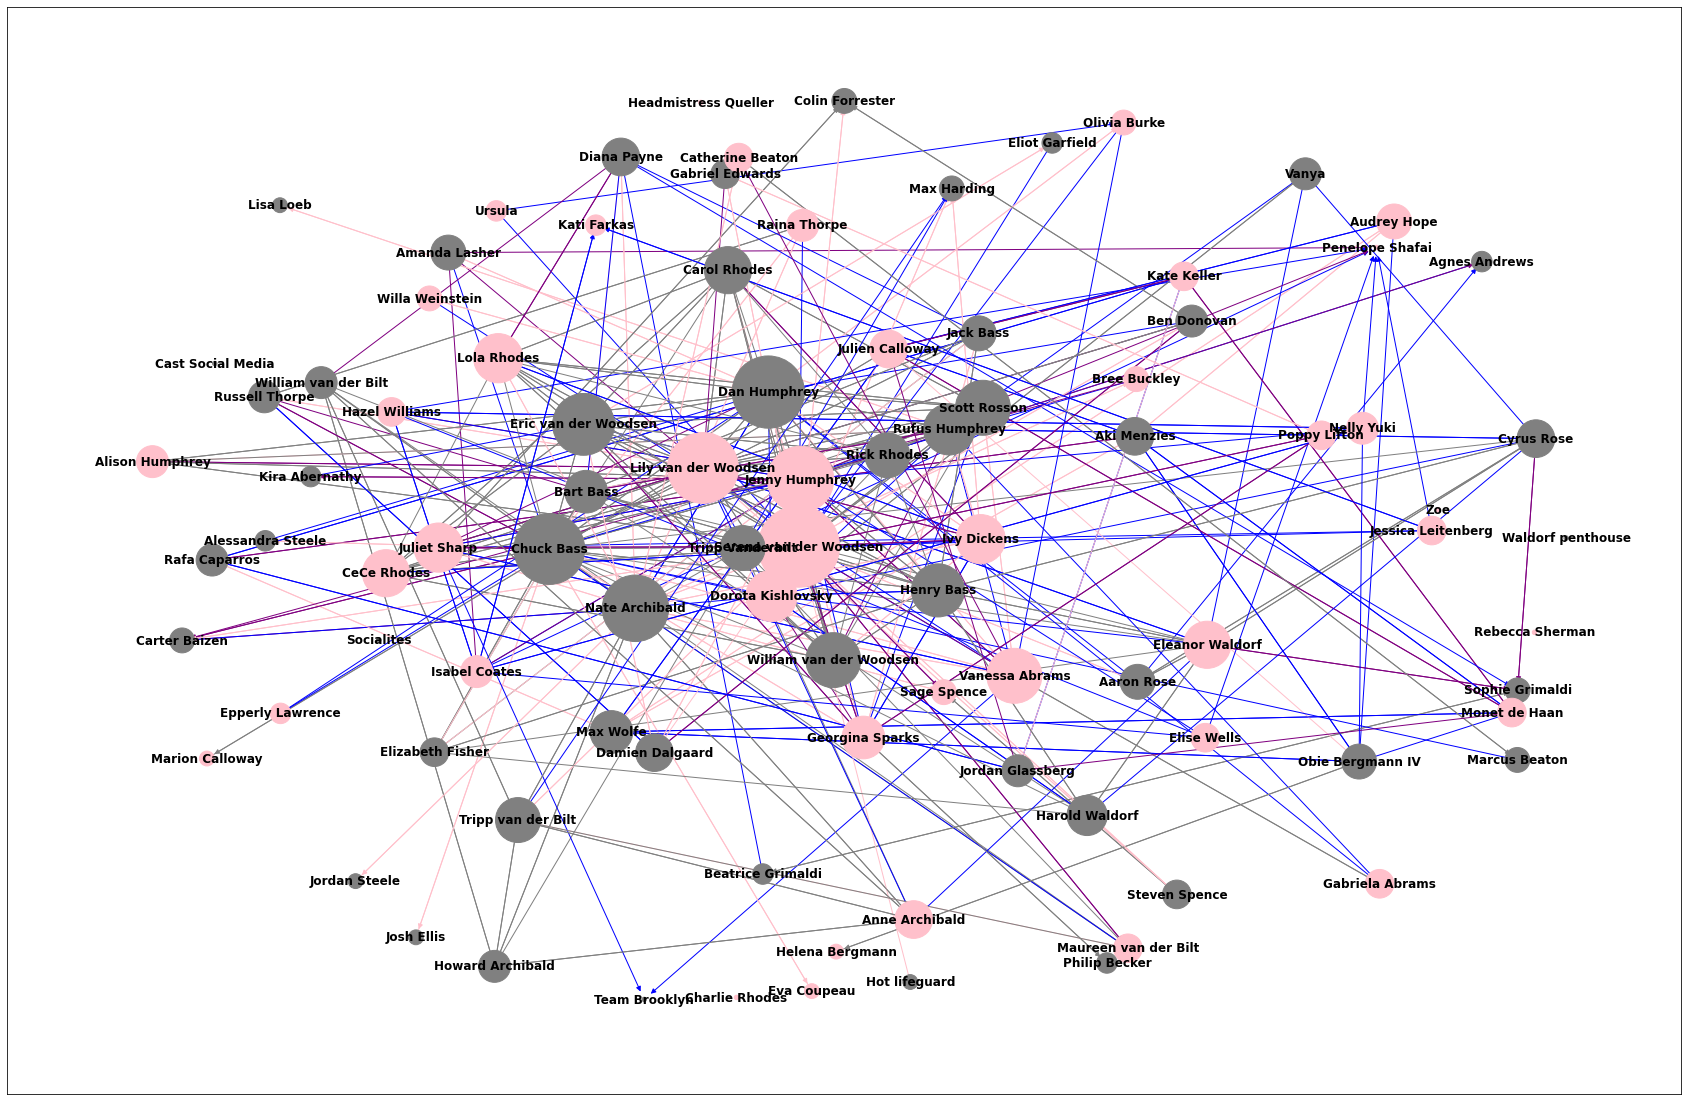

In [48]:
## create network with nodes and edges
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from fa2 import ForceAtlas2
 
edgeListFamily = []
edgeListRomances = []
edgeListFriends = []
edgeListEnemies = []


def createNetwork():

    edgeListFamily = []
    edgeListRomances = []
    edgeListFriends = []
    edgeListEnemies = []
    for i in range(len(listCharachters)):
        for j in DF['Family'][i]:
            if(j in listCharachters):
                edgeListFamily.append((listCharachters[i],j))

        for j in DF['Romances'][i]:
            if(j in listCharachters):
                edgeListRomances.append((listCharachters[i],j))

        for j in DF['Friends'][i]:
            if(j in listCharachters):
                edgeListFriends.append((listCharachters[i],j))

        for j in DF['Enemies'][i]:
            if(j in listCharachters):
                edgeListEnemies.append((listCharachters[i],j))


    fig, ax = plt.subplots()
    fig.set_size_inches(30,20)

    G = nx.DiGraph()
    G.add_nodes_from(listCharachters)
    G.add_edges_from(edgeListFamily)
    G.add_edges_from(edgeListRomances)
    G.add_edges_from(edgeListFriends)
    G.add_edges_from(edgeListEnemies)



    sizes = DF['size/episodes']
    gender = DF['gender']
    nodesizes = [int(s)*200+20 for s in sizes]
    print(nodesizes)


    pos = nx.spring_layout(G, k=6*1/np.sqrt(len(G.nodes())), iterations=20)
    nx.draw_networkx_nodes(G, pos=pos, node_size = nodesizes, node_color= gender )
    nx.draw_networkx_edges(G,pos=pos, width=1, edge_color=getEdgeColors(G.edges, edgeListFamily, edgeListRomances, edgeListFriends))
    nx.draw_networkx_labels(G,pos=pos, font_weight='bold',font_color='black')
    plt.show()
    
    return G  

#get edge colors
def getEdgeColors(edges, edgeListFamily, edgeListRomances, edgeListFriends):
    colors = []
    for e in edges:
        if e in edgeListFamily:
            colors.append("grey")
        elif e in edgeListRomances:
            colors.append("pink")
        elif e in edgeListFriends:
            colors.append("blue")
        else: 
            colors.append("purple")
    return colors
    

createNetwork()



### Create Network for one node/charachter


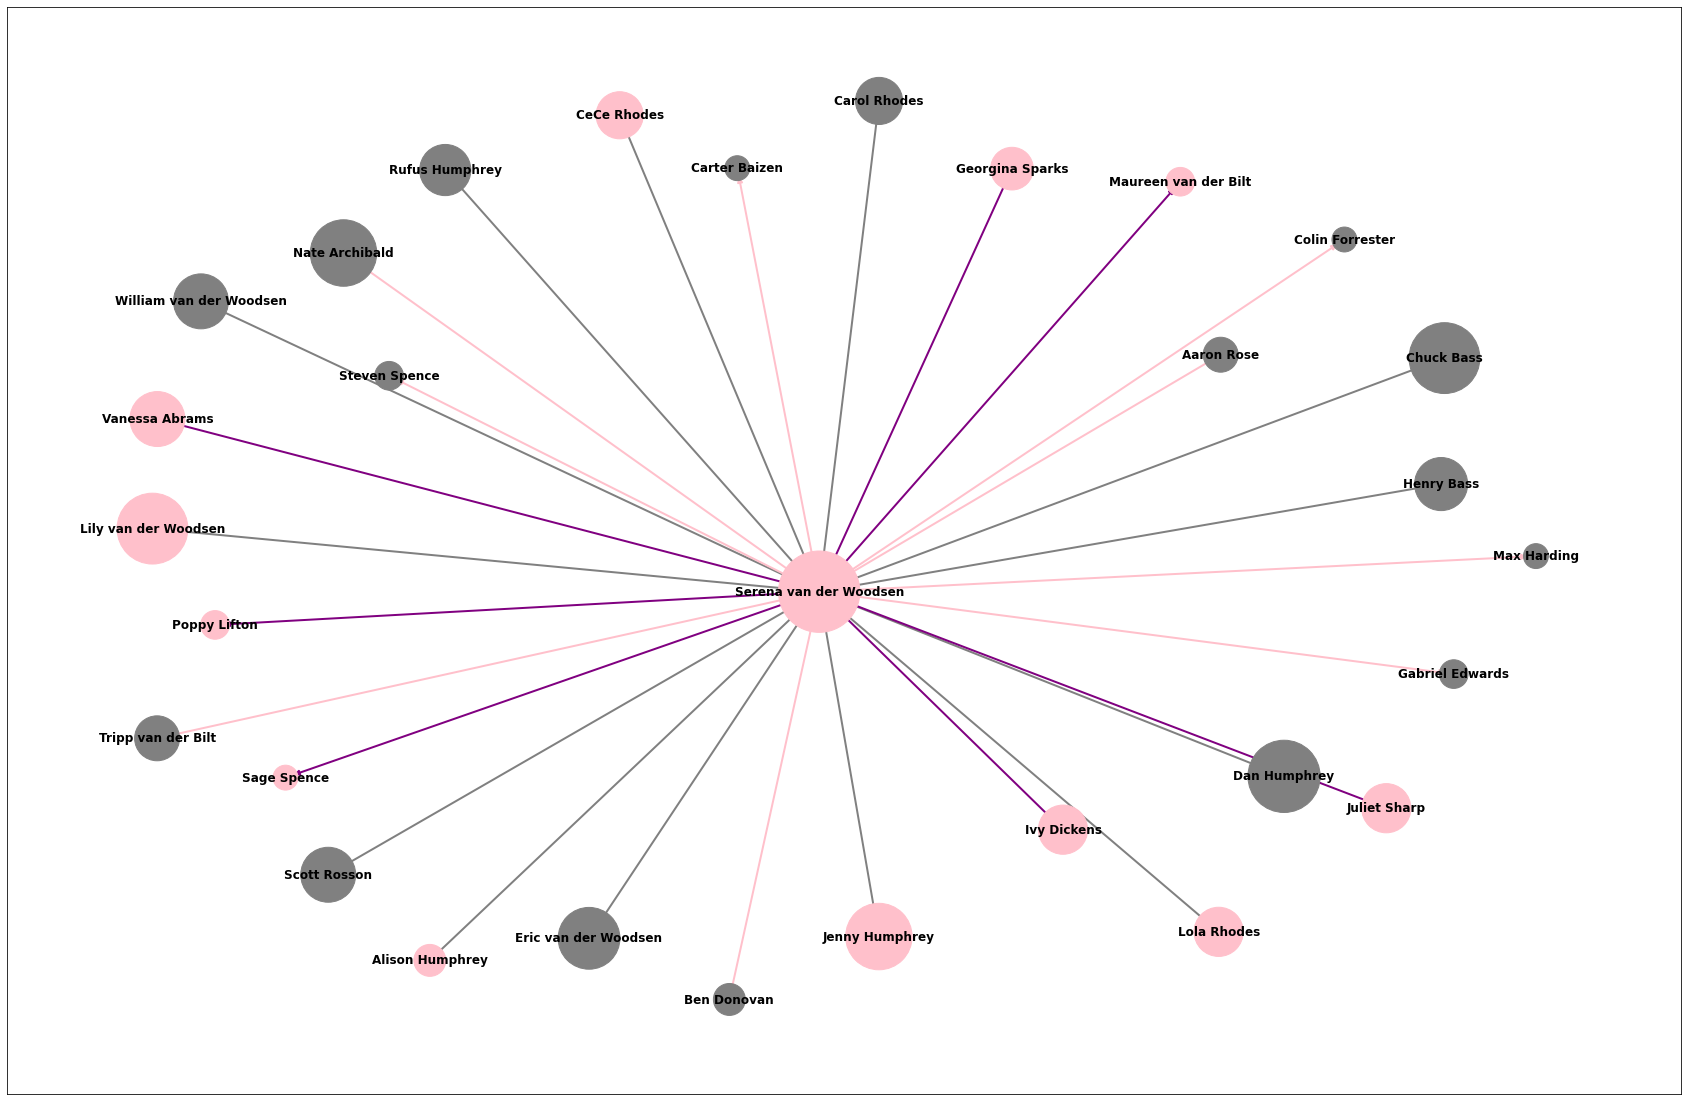

In [44]:
## Create network for one node with belonging neidgbors and edges

def createNetworkSingleNode(node):
    
    G = nx.DiGraph()
    
    edgeListFamily = []
    edgeListRomances = []
    edgeListFriends = []
    edgeListEnemies = []
    
    sizes = []
    gender = []
    
    i = listCharachters.index(node)
    for j in DF['Family'][i]:
        if(j in listCharachters):
            G.add_node(j)
            sizes.append(getSize(j))
            gender.append(getGender(j))
            edgeListFamily.append((listCharachters[i],j))

    for j in DF['Romances'][i]:
        if(j in listCharachters and j not in G.nodes):
            G.add_node(j)
            sizes.append(getSize(j))
            gender.append(getGender(j))
            edgeListRomances.append((listCharachters[i],j))

    for j in DF['Friends'][i]:
        if(j in listCharachters and j not in G.nodes):
            G.add_node(j)
            sizes.append(getSize(j))
            gender.append(getGender(j))
            edgeListFriends.append((listCharachters[i],j))

    for j in DF['Enemies'][i]:
        if(j in listCharachters and j not in G.nodes):
            G.add_node(j)
            sizes.append(getSize(j))
            gender.append(getGender(j))
            edgeListEnemies.append((listCharachters[i],j))

    sizes.append(DF['size/episodes'][i])
    gender.append(DF['gender'][i])
    fig, ax = plt.subplots()
    fig.set_size_inches(30,20)
    
    G.add_edges_from(edgeListFamily)
    G.add_edges_from(edgeListRomances)
    G.add_edges_from(edgeListFriends)
    G.add_edges_from(edgeListEnemies)

    nodesizes = [int(s)*200+20 for s in sizes]

    pos = nx.spring_layout(G, k=6*1/np.sqrt(len(G.nodes())), iterations=20)
    nx.draw_networkx_nodes(G, pos=pos, node_size = nodesizes, node_color= gender )
    nx.draw_networkx_edges(G,pos=pos, width=2, edge_color=getEdgeColors(G.edges, edgeListFamily, edgeListRomances, edgeListFriends))
    nx.draw_networkx_labels(G,pos=pos, font_weight='bold',font_color='black')
    plt.show()
    plt.savefig
    

createNetworkSingleNode('Serena van der Woodsen')



### Info about graph 

### 10 most conected charachters

[1020, 1020, 1420, 2220, 20, 1820, 620, 1220, 1820, 20, 3020, 220, 420, 220, 3020, 1220, 420, 4420, 820, 20, 420, 620, 5020, 820, 420, 820, 620, 820, 1020, 1020, 220, 1020, 20, 1220, 20, 2220, 420, 1020, 2220, 1020, 2620, 5220, 820, 1420, 5020, 820, 4420, 220, 1020, 1220, 820, 620, 20, 20, 620, 820, 220, 3020, 2620, 620, 1020, 620, 1220, 1420, 620, 6620, 20, 2820, 2020, 2420, 620, 820, 220, 1420, 1420, 2020, 2420, 420, 420, 3820, 420, 2420, 820, 2020, 1420, 820, 420, 1820, 1020, 20, 1620, 820, 220, 1020]


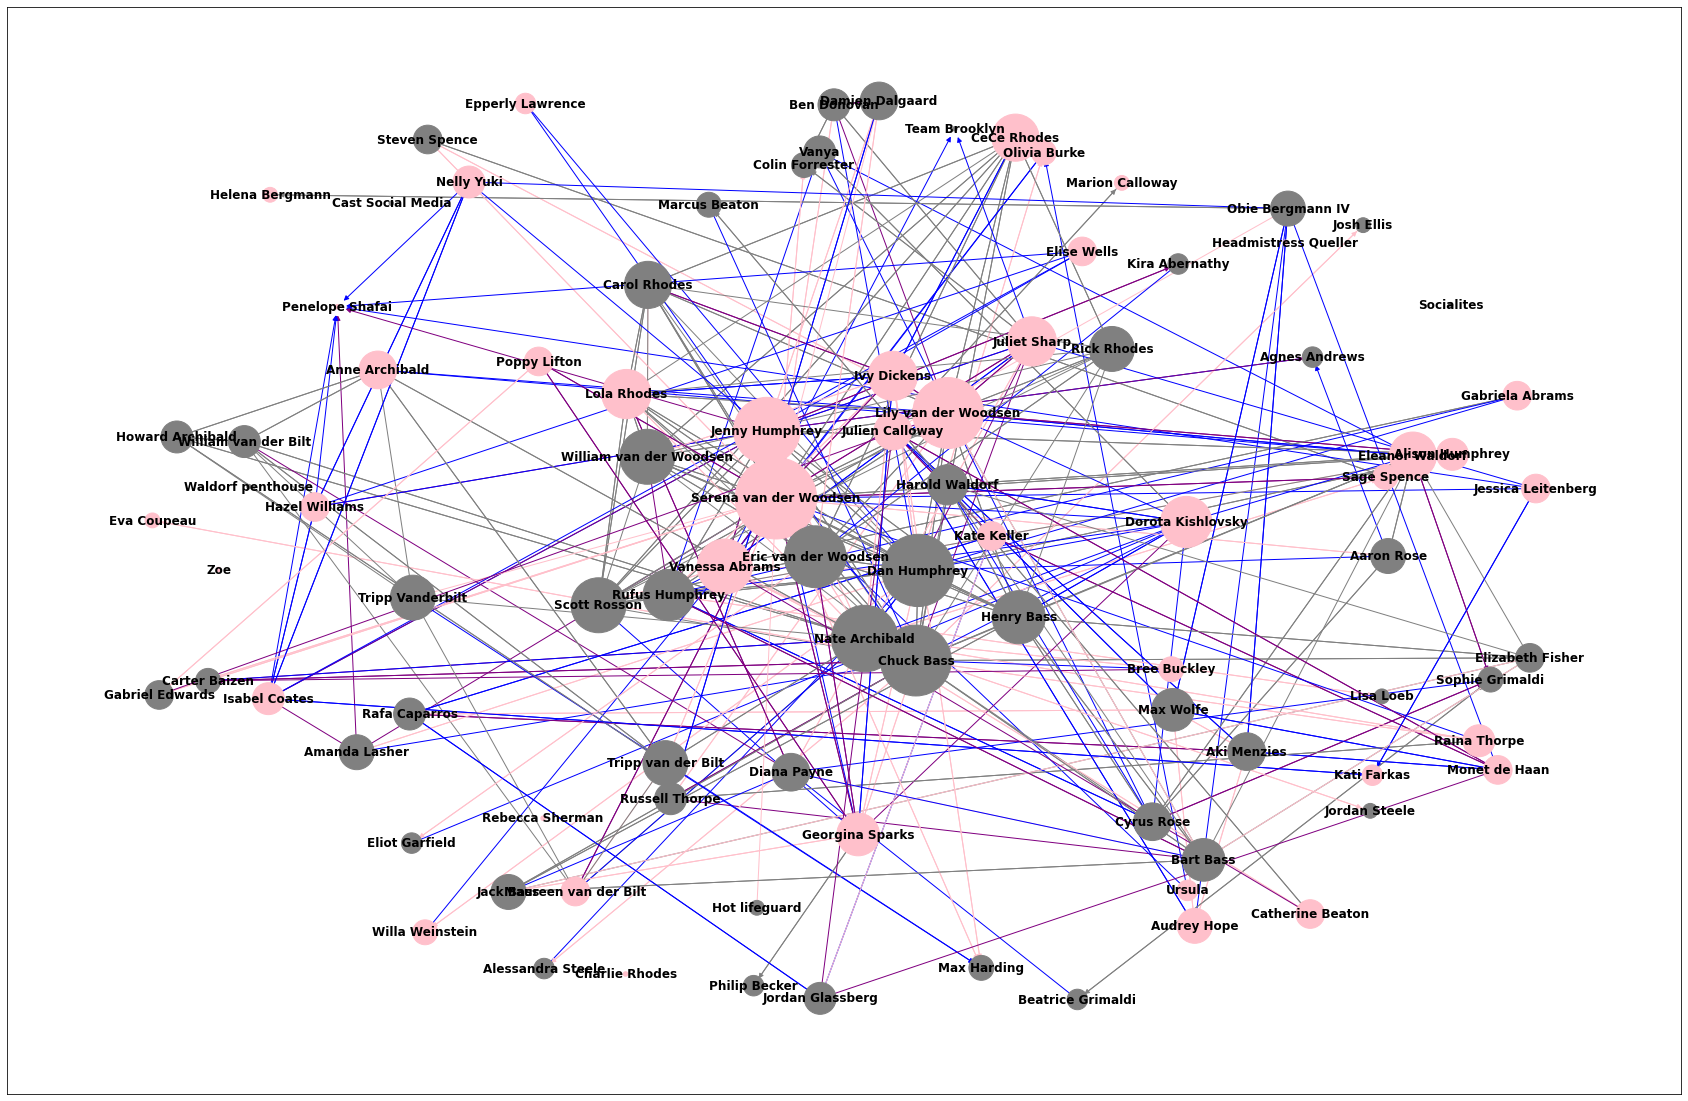

Number of edges in the directed graph is 520
Number of edges in the Undirected graph is 312
The ten nodes with the highest degree is  [('Serena van der Woodsen', 68), ('Chuck Bass', 52), ('Dan Humphrey', 44), ('Nate Archibald', 42), ('Lily van der Woodsen', 42), ('Jenny Humphrey', 36), ('Eric van der Woodsen', 31), ('Henry Bass', 29), ('Rufus Humphrey', 25)]


In [50]:
# Info. graph 
G = createNetwork()
print("Number of edges in the directed graph is", G.number_of_edges())

H = G.to_undirected()

print("Number of edges in the Undirected graph is", H.number_of_edges())

SortedG = sorted(G.degree, key=lambda x: x[1], reverse=True)
print("The ten nodes with the highest degree is ",  SortedG[:9] )


# Word clouds for the top 10 most conected components 



In [37]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import math

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/olinezachariassen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/olinezachariassen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/olinezachariassen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [91]:

charachters10 = SortedG[:9]

#for title in titles:
    #response = requests.get(baseurl.format(title))
    #pagedict[title] = response.json()
    #key = next(iter(response.json()["query"]["pages"].keys()))
    #stringdict[title] = response.json()["query"]["pages"][key]["revisions"][0]['slots']['main']['*']
    
    

for i, charachter in enumerate(charachters10):
    url =  requests.get(f"https://gossipgirl.fandom.com/wiki/Serena van der Woodsen#Television_Series")
    soup = BeautifulSoup(url.text)
    


    #Family= []
    #Romances = []
    #Friends = []
    #Enemies = []

    try:
        infoBox = soup.findAll('div',{'class':'main-container'})
        infoBox = soup.findAll('div',{'class':'resizable-container'})
        infoBox = soup.findAll('div',{'class':'page has-right-rail'})
        infoBox = soup.findAll('div',{'class':'page-content'})
        infoBox = soup.findAll('p')[3:]
        #print(infoBox[1])
        for p in infoBox:
            text = infoBox[1].lower()
            text = re.sub(r'\{\{.*?\}\}', '', text)
            text = re.sub(r'\[\[.*?\]\]', '', text)
            text = re.sub(r'\<.*?\>', '', text)
            text_tokens = word_tokenize(text)
            tokens = [word for word in text_tokens if not word in stopwords.words()]
    
        
        
    except:
        print('no')
        


<p>She, <a href="/wiki/Dan_Humphrey" title="Dan Humphrey">Dan</a> and <a href="/wiki/Blair_Waldorf" title="Blair Waldorf">Blair</a> are the only characters that appear in every episode of the TV series.
</p>
no
<p>She, <a href="/wiki/Dan_Humphrey" title="Dan Humphrey">Dan</a> and <a href="/wiki/Blair_Waldorf" title="Blair Waldorf">Blair</a> are the only characters that appear in every episode of the TV series.
</p>
no
<p>She, <a href="/wiki/Dan_Humphrey" title="Dan Humphrey">Dan</a> and <a href="/wiki/Blair_Waldorf" title="Blair Waldorf">Blair</a> are the only characters that appear in every episode of the TV series.
</p>
no
<p>She, <a href="/wiki/Dan_Humphrey" title="Dan Humphrey">Dan</a> and <a href="/wiki/Blair_Waldorf" title="Blair Waldorf">Blair</a> are the only characters that appear in every episode of the TV series.
</p>
no
<p>She, <a href="/wiki/Dan_Humphrey" title="Dan Humphrey">Dan</a> and <a href="/wiki/Blair_Waldorf" title="Blair Waldorf">Blair</a> are the only characters 